### 🔧 环境配置和检查

#### 概述

本教程需要特定的环境配置以确保最佳学习体验。以下配置将帮助你：

- 使用统一的conda环境：激活统一的学习环境
- 通过国内镜像源快速安装依赖：配置pip使用清华镜像源
- 加速模型下载：设置HuggingFace镜像代理
- 检查系统配置：检查硬件和软件配置

#### 配置

- **所需环境及其依赖已经部署好**
- 在`Notebook`右上角选择`jupyter内核`为`python(agent101)`，即可执行下方代码

In [1]:
%%script bash

# 1. 激活 conda 环境 (仅对当前单元格有效)
eval "$(conda shell.bash hook)"
conda activate agent101

echo "========================================="
echo "== Conda 环境检查报告 (仅针对当前 Bash 子进程) =="
echo "========================================="

# 2. 检查当前激活的环境
CURRENT_ENV_NAME=$(basename $CONDA_PREFIX)

if [ "$CURRENT_ENV_NAME" = "agent101" ]; then
    echo "✅ 当前单元格已成功激活到 agent101 环境。"
    echo "✅ 正在使用的环境路径: $CONDA_PREFIX"
    echo ""
    echo "💡 提示: 后续的Python单元格将使用Notebook当前选择的Jupyter内核。"
    echo "   如果需要后续单元格也使用此环境，请执行以下操作:"
    echo "   1. 检查 Notebook 右上角是否已选择 'python(agent101)'。"
else
    echo "❌ 激活失败或环境名称不匹配。当前环境: $CURRENT_ENV_NAME"
    echo ""
    echo "⚠️ 严重提示: 建议将 Notebook 的 Jupyter **内核 (Kernel)** 切换为 'python(agent101)'。"
    echo "   (通常位于 Notebook 右上角或 '内核' 菜单中)"
    echo ""
    echo "📚 备用方法 (不推荐): 如果无法切换内核，则必须在**每个**代码单元格的头部重复以下命令:"
    echo ""
    echo "%%script bash"
    echo "# 必须在每个单元格都执行"
    echo "eval \"\$(conda shell.bash hook)\""
    echo "conda activate agent101"
fi

echo "=========================================" 

== Conda 环境检查报告 (仅针对当前 Bash 子进��) ==
✅ 当前单元格已成功激活到 agent101 环境。
✅ 正在使用的环境路径: /root/miniconda3/envs/agent101

💡 提示: 后续的Python单元格将使用Notebook当前选择的Jupyter��核。
   如果需要后续单元格也使用此环境，请执行以下操作:
   1. 检查 Notebook 右上角是否已选择 'python(agent101)'。


In [2]:
# 2. 设置pip 为清华源
%pip config list -v set global.index-url https://pypi.tuna.tsinghua.edu.cn/simple
%pip config list -v list


For variant 'global', will try loading '/etc/xdg/pip/pip.conf'
For variant 'global', will try loading '/etc/pip.conf'
For variant 'user', will try loading '/root/.pip/pip.conf'
For variant 'user', will try loading '/root/.config/pip/pip.conf'
For variant 'site', will try loading '/root/miniconda3/envs/agent101/pip.conf'
ERROR: Got unexpected number of arguments, expected 0. (example: "/root/miniconda3/envs/agent101/bin/python -m pip config list")
Note: you may need to restart the kernel to use updated packages.
For variant 'global', will try loading '/etc/xdg/pip/pip.conf'
For variant 'global', will try loading '/etc/pip.conf'
For variant 'user', will try loading '/root/.pip/pip.conf'
For variant 'user', will try loading '/root/.config/pip/pip.conf'
For variant 'site', will try loading '/root/miniconda3/envs/agent101/pip.conf'
ERROR: Got unexpected number of arguments, expected 0. (example: "/root/miniconda3/envs/agent101/bin/python -m pip config list")
Note: you may need to restart th

In [3]:
# 3. 设置HuggingFace代理
%env HF_ENDPOINT=https://hf-mirror.com
# 验证：使用shell命令检查
!echo $HF_ENDPOINT

env: HF_ENDPOINT=https://hf-mirror.com
https://hf-mirror.com


In [4]:
# 🔍 环境信息检查脚本
#
# 本脚本的作用：
# 1. 安装 pandas 库用于数据表格展示
# 2. 检查系统的各项配置信息
# 3. 生成详细的环境报告表格
#
# 对于初学者来说，这个步骤帮助你：
# - 了解当前运行环境的硬件配置
# - 确认是否满足模型运行的最低要求
# - 学习如何通过代码获取系统信息

# 安装 pandas 库 - 用于创建和展示数据表格
# pandas 是 Python 中最流行的数据处理和分析库
%pip install pandas==2.2.2 tabulate==0.9.0

import platform # 导入 platform 模块以获取系统信息
import os # 导入 os 模块以与操作系统交互
import subprocess # 导入 subprocess 模块以运行外部命令
import pandas as pd # 导入 pandas 模块，通常用于数据处理，这里用于创建表格
import shutil # 导入 shutil 模块以获取磁盘空间信息

# 获取 CPU 信息的函数，包括核心数量
def get_cpu_info():
    cpu_info = "" # 初始化 CPU 信息字符串
    physical_cores = "N/A"
    logical_cores = "N/A"

    if platform.system() == "Windows": # 如果是 Windows 系统
        cpu_info = platform.processor() # 使用 platform.processor() 获取 CPU 信息
        try:
            # 获取 Windows 上的核心数量 (需要 WMI)
            import wmi
            c = wmi.WMI()
            for proc in c.Win32_Processor():
                physical_cores = proc.NumberOfCores
                logical_cores = proc.NumberOfLogicalProcessors
        except:
            pass # 如果 WMI 不可用，忽略错误

    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取 CPU 信息和核心数量
        os.environ['PATH'] = os.environ['PATH'] + os.pathsep + '/usr/sbin' # 更新 PATH 环境变量
        try:
            process_brand = subprocess.Popen(['sysctl', "machdep.cpu.brand_string"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_brand, stderr_brand = process_brand.communicate()
            cpu_info = stdout_brand.decode().split(': ')[1].strip() if stdout_brand else "Could not retrieve CPU info"

            process_physical = subprocess.Popen(['sysctl', "hw.physicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_physical, stderr_physical = process_physical.communicate()
            physical_cores = stdout_physical.decode().split(': ')[1].strip() if stdout_physical else "N/A"

            process_logical = subprocess.Popen(['sysctl', "hw.logicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_logical, stderr_logical = process_logical.communicate()
            logical_cores = stdout_logical.decode().split(': ')[1].strip() if stdout_logical else "N/A"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/cpuinfo 文件获取 CPU 信息和核心数量
            with open('/proc/cpuinfo') as f:
                physical_cores_count = 0
                logical_cores_count = 0
                cpu_info_lines = []
                for line in f:
                    if line.startswith('model name'): # 查找以 'model name'开头的行
                        if not cpu_info: # 只获取第一个 model name
                            cpu_info = line.split(': ')[1].strip()
                    elif line.startswith('cpu cores'): # 查找以 'cpu cores' 开头的行
                        physical_cores_count = int(line.split(': ')[1].strip())
                    elif line.startswith('processor'): # 查找以 'processor' 开头的行
                        logical_cores_count += 1
                physical_cores = str(physical_cores_count) if physical_cores_count > 0 else "N/A"
                logical_cores = str(logical_cores_count) if logical_cores_count > 0 else "N/A"
                if not cpu_info:
                     cpu_info = "Could not retrieve CPU info"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    return f"{cpu_info} ({physical_cores} physical cores, {logical_cores} logical cores)" # 返回 CPU 信息和核心数量


# 获取内存信息的函数
def get_memory_info():
    mem_info = "" # 初始化内存信息字符串
    if platform.system() == "Windows":
        # 在 Windows 上不容易通过标准库获取，需要外部库或 PowerShell
        mem_info = "Requires external tools on Windows" # 设置提示信息
    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取内存大小
        process = subprocess.Popen(['sysctl', "hw.memsize"], stdout=subprocess.PIPE, stderr=subprocess.PIPE) # 运行 sysctl 命令
        stdout, stderr = process.communicate() # 获取标准输出和标准错误
        mem_bytes = int(stdout.decode().split(': ')[1].strip()) # 解析输出，获取内存大小（字节）
        mem_gb = mem_bytes / (1024**3) # 转换为 GB
        mem_info = f"{mem_gb:.2f} GB" # 格式化输出
    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/meminfo 文件获取内存信息
            with open('/proc/meminfo') as f:
                total_mem_kb = 0
                available_mem_kb = 0
                for line in f:
                    if line.startswith('MemTotal'): # 查找以 'MemTotal' 开头的行
                        total_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取总内存（KB）
                    elif line.startswith('MemAvailable'): # 查找以 'MemAvailable' 开头的行
                         available_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取可用内存（KB）

                if total_mem_kb > 0:
                    total_mem_gb = total_mem_kb / (1024**2) # 转换为 GB
                    mem_info = f"{total_mem_gb:.2f} GB" # 格式化输出总内存
                    if available_mem_kb > 0:
                        available_mem_gb = available_mem_kb / (1024**2)
                        mem_info += f" (Available: {available_mem_gb:.2f} GB)" # 添加可用内存信息
                else:
                     mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息

        except:
            mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息
    return mem_info # 返回内存信息

# 获取 GPU 信息的函数，包括显存
def get_gpu_info():
    try:
        # 尝试使用 nvidia-smi 获取 NVIDIA GPU 信息和显存
        result = subprocess.run(['nvidia-smi', '--query-gpu=name,memory.total', '--format=csv,noheader'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            gpu_lines = result.stdout.strip().split('\n') # 解析输出，获取 GPU 名称和显存
            gpu_info_list = []
            for line in gpu_lines:
                name, memory = line.split(', ')
                gpu_info_list.append(f"{name} ({memory})") # 格式化 GPU 信息
            return ", ".join(gpu_info_list) if gpu_info_list else "NVIDIA GPU found, but info not listed" # 返回 GPU 信息或提示信息
        else:
             # 尝试使用 lshw 获取其他 GPU 信息 (需要安装 lshw)
            try:
                result_lshw = subprocess.run(['lshw', '-C', 'display'], capture_output=True, text=True)
                if result_lshw.returncode == 0: # 如果命令成功执行
                     # 简单解析输出中的 product 名称和显存
                    gpu_info_lines = []
                    current_gpu = {}
                    for line in result_lshw.stdout.splitlines():
                        if 'product:' in line:
                             if current_gpu:
                                 gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")
                             current_gpu = {'product': line.split('product:')[1].strip()}
                        elif 'size:' in line and 'memory' in line:
                             current_gpu['memory'] = line.split('size:')[1].strip()

                    if current_gpu: # 添加最后一个 GPU 的信息
                        gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")

                    return ", ".join(gpu_info_lines) if gpu_info_lines else "GPU found (via lshw), but info not parsed" # 如果找到 GPU 但信息无法解析，设置提示信息
                else:
                    return "No GPU found (checked nvidia-smi and lshw)" # 如果两个命令都找不到 GPU，设置提示信息
            except FileNotFoundError:
                 return "No GPU found (checked nvidia-smi, lshw not found)" # 如果找不到 lshw 命令，设置提示信息
    except FileNotFoundError:
        return "No GPU found (nvidia-smi not found)" # 如果找不到 nvidia-smi 命令，设置提示信息


# 获取 CUDA 版本的函数
def get_cuda_version():
    try:
        # 尝试使用 nvcc --version 获取 CUDA 版本
        result = subprocess.run(['nvcc', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            for line in result.stdout.splitlines():
                if 'release' in line: # 查找包含 'release' 的行
                    return line.split('release ')[1].split(',')[0] # 解析行，提取版本号
        return "CUDA not found or version not parsed" # 如果找不到 CUDA 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "CUDA not found" # 如果找不到 nvcc 命令，设置提示信息

# 获取 Python 版本的函数
def get_python_version():
    return platform.python_version() # 获取 Python 版本

# 获取 Conda 版本的函数
def get_conda_version():
    try:
        # 尝试使用 conda --version 获取 Conda 版本
        result = subprocess.run(['conda', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            return result.stdout.strip() # 返回 Conda 版本
        return "Conda not found or version not parsed" # 如果找不到 Conda 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "Conda not found" # 如果找不到 conda 命令，设置提示信息

# 获取物理磁盘空间信息的函数
def get_disk_space():
    try:
        total, used, free = shutil.disk_usage("/") # 获取根目录的磁盘使用情况
        total_gb = total / (1024**3) # 转换为 GB
        used_gb = used / (1024**3) # 转换为 GB
        free_gb = free / (1024**3) # 转换为 GB
        return f"Total: {total_gb:.2f} GB, Used: {used_gb:.2f} GB, Free: {free_gb:.2f} GB" # 格式化输出
    except Exception as e:
        return f"Could not retrieve disk info: {e}" # 如果获取信息出错，设置错误信息

# 获取环境信息
os_name = platform.system() # 获取操作系统名称
os_version = platform.release() # 获取操作系统版本
if os_name == "Linux":
    try:
        # 在 Linux 上尝试获取发行版和版本
        lsb_info = subprocess.run(['lsb_release', '-a'], capture_output=True, text=True)
        if lsb_info.returncode == 0: # 如果命令成功执行
            for line in lsb_info.stdout.splitlines():
                if 'Description:' in line: # 查找包含 'Description:' 的行
                    os_version = line.split('Description:')[1].strip() # 提取描述信息作为版本
                    break # 找到后退出循环
                elif 'Release:' in line: # 查找包含 'Release:' 的行
                     os_version = line.split('Release:')[1].strip() # 提取版本号
                     # 尝试获取 codename
                     try:
                         codename_info = subprocess.run(['lsb_release', '-c'], capture_output=True, text=True)
                         if codename_info.returncode == 0:
                             os_version += f" ({codename_info.stdout.split(':')[1].strip()})" # 将 codename 添加到版本信息中
                     except:
                         pass # 如果获取 codename 失败则忽略

    except FileNotFoundError:
        pass # lsb_release 可能未安装，忽略错误

full_os_info = f"{os_name} {os_version}" # 组合完整的操作系统信息
cpu_info = get_cpu_info() # 调用函数获取 CPU 信息和核心数量
memory_info = get_memory_info() # 调用函数获取内存信息
gpu_info = get_gpu_info() # 调用函数获取 GPU 信息和显存
cuda_version = get_cuda_version() # 调用函数获取 CUDA 版本
python_version = get_python_version() # 调用函数获取 Python 版本
conda_version = get_conda_version() # 调用函数获取 Conda 版本
disk_info = get_disk_space() # 调用函数获取物理磁盘空间信息


# 创建用于存储数据的字典
env_data = {
    "项目": [ # 项目名称列表
        "操作系统",
        "CPU 信息",
        "内存信息",
        "GPU 信息",
        "CUDA 信息",
        "Python 版本",
        "Conda 版本",
        "物理磁盘空间" # 添加物理磁盘空间
    ],
    "信息": [ # 对应的信息列表
        full_os_info,
        cpu_info,
        memory_info,
        gpu_info,
        cuda_version,
        python_version,
        conda_version,
        disk_info # 添加物理磁盘空间信息
    ]
}

# 创建一个 pandas DataFrame
df = pd.DataFrame(env_data)

# 打印表格
print("### 环境信息") # 打印标题
print(df.to_markdown(index=False)) # 将 DataFrame 转换为 Markdown 格式并打印，不包含索引


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
### 环境信息
| 项目         | 信息                                                                               |
|:-------------|:-----------------------------------------------------------------------------------|
| 操作系统     | Linux Ubuntu 22.04.4 LTS                                                           |
| CPU 信息     | 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz (1 physical cores, 4 logical cores) |
| 内存信息     | 5.75 GB (Available: 3.52 GB)                                                       |
| GPU 信息     | No GPU found (nvidia-smi not found)                                                |
| CUDA 信息    | CUDA not found                                                                     |
| Python 版本  | 3.10.18                                                                            |
| Conda 版本   | conda 24.4.0                                         

# 聊天机器人：消息摘要与外部数据库

## 课程回顾

在前面的课程中，我们构建了一个具有记忆能力的Agent。

## 学习目标

但是，如果我们**希望聊天机器人拥有可以无限期持久化的存储呢？**

现在，我们将**介绍一些更高级的检查点器，它们支持外部数据库。**

在这里，我们将展示如何使用 [SQLite作为检查点器](https://langchain-ai.github.io/langgraph/concepts/low_level/#checkpointer)，但其他检查点器（如 [Postgres](https://langchain-ai.github.io/langgraph/how-tos/persistence_postgres/)）也是可用的！

## 核心概念

### 什么是检查点器（Checkpointer）？
检查点器是LangGraph中用于保存和恢复图执行状态的组件。它允许：
- **状态持久化**：将对话状态保存到外部存储
- **会话恢复**：在应用重启后恢复之前的对话
- **多线程支持**：支持多个并发对话会话
- **历史追踪**：记录完整的执行历史

### 为什么需要外部数据库？
- **内存限制**：Python进程重启后，内存中的状态会丢失
- **可扩展性**：支持多个用户同时使用
- **可靠性**：数据持久化，不会因系统故障丢失
- **生产环境**：满足生产环境的数据存储需求

In [5]:
# 安装必要的依赖包
# 这个命令会安装LangGraph的SQLite检查点器和其他核心依赖
%pip install --quiet langchain_openai==0.3.32 langchain_core==0.3.75 langgraph==0.6.7 langgraph-checkpoint-sqlite==2.0.11
# 依赖包说明：
# - langgraph-checkpoint-sqlite: SQLite检查点器，用于持久化状态
# - langchain_core: LangChain核心功能
# - langgraph: LangGraph图执行框架
# - langchain_openai: OpenAI模型集成

Note: you may need to restart the kernel to use updated packages.


In [6]:
# 环境变量配置
# 设置OpenAI API密钥，这是使用OpenAI模型所必需的
import os, getpass

def _set_env(var: str):
    """
    安全地设置环境变量
    如果环境变量不存在，会提示用户输入
    """
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# 设置OpenAI API密钥
# 你需要从 https://platform.openai.com/api-keys 获取API密钥
_set_env("OPENAI_API_KEY")
# 设置 OpenAI API代理地址 (例如：https://api.apiyi.com/v1）
_set_env("OPENAI_BASE_URL")

## SQLite 数据库介绍

这里我们使用 [SqliteSaver检查点器](https://langchain-ai.github.io/langgraph/concepts/low_level/#checkpointer) 作为起点。

SQLite是一个[小巧、快速、高度流行](https://x.com/karpathy/status/1819490455664685297)的SQL数据库。

### SQLite的优势
- **轻量级**：无需单独的数据库服务器
- **零配置**：开箱即用
- **跨平台**：支持所有主流操作系统
- **ACID兼容**：支持事务处理
- **嵌入式**：可以直接嵌入到应用程序中

如果我们提供 `":memory:"` 参数，它会创建一个内存中的SQLite数据库。

In [7]:
# 创建SQLite数据库连接
import sqlite3

# 创建内存数据库连接
# ":memory:" 表示创建一个临时的内存数据库
# check_same_thread=False 允许多线程访问（LangGraph需要）
conn = sqlite3.connect(":memory:", check_same_thread=False)

print("✅ 已创建内存SQLite数据库连接")
print("📝 注意：内存数据库在程序结束后会丢失数据")

✅ 已创建内存SQLite数据库连接
📝 注意：内存数据库在程序结束后会丢失数据


但是，如果我们提供一个数据库路径，它就会为我们创建一个持久化的数据库文件！

In [8]:
# 创建持久化数据库
# 设置数据库文件路径
db_path = "state_db/example.db"

# 连接到持久化数据库文件
# 这个数据库文件会保存在磁盘上，程序重启后数据不会丢失
conn = sqlite3.connect(db_path, check_same_thread=False)

print("✅ 已连接到持久化SQLite数据库")
print(f"📁 数据库文件位置: {db_path}")
print("💾 数据将持久化保存到磁盘")

✅ 已连接到持久化SQLite数据库
📁 数据库文件位置: state_db/example.db
💾 数据将持久化保存到磁盘


In [9]:
# 创建SQLite检查点器
# 这是LangGraph中用于持久化状态的组件
from langgraph.checkpoint.sqlite import SqliteSaver

# 使用SQLite连接创建检查点器
# 这个检查点器将负责保存和恢复图的状态
memory = SqliteSaver(conn)

print("✅ 已创建SQLite检查点器")
print("🔧 检查点器将管理对话状态的持久化")

✅ 已创建SQLite检查点器
🔧 检查点器将管理对话状态的持久化


现在让我们重新定义我们的聊天机器人。

## 聊天机器人架构设计

我们将构建一个具有以下功能的智能聊天机器人：

### 核心功能
1. **对话管理**：处理用户输入并生成回复
2. **消息摘要**：当对话过长时自动生成摘要
3. **状态持久化**：使用SQLite保存对话历史
4. **智能路由**：根据对话长度决定是否进行摘要

### 状态设计
- **messages**：存储对话消息列表
- **summary**：存储对话摘要
- **自动摘要触发**：当消息数量超过6条时触发摘要

In [10]:
# 导入必要的库
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, HumanMessage, RemoveMessage
from langgraph.graph import END
from langgraph.graph import MessagesState

# 初始化OpenAI模型
# 使用GPT-4o模型，temperature=0确保输出稳定一致
model = ChatOpenAI(model="gpt-4o", temperature=0)

# 定义状态类
# 继承MessagesState，添加summary字段用于存储对话摘要
class State(MessagesState):
    """聊天机器人状态类"""
    summary: str  # 存储对话摘要

def call_model(state: State):
    """
    调用AI模型生成回复

    Args:
        state: 当前对话状态

    Returns:
        dict: 包含AI回复的状态更新
    """
    # 获取现有摘要（如果存在）
    summary = state.get("summary", "")

    # 如果存在摘要，将其添加到系统消息中
    if summary:
        # 创建包含摘要的系统消息
        system_message = f"此前对话的摘要：{summary}"
        # 将系统消息添加到消息列表开头
        messages = [SystemMessage(content=system_message)] + state["messages"]
    else:
        # 如果没有摘要，直接使用原始消息
        messages = state["messages"]

    # 调用AI模型生成回复
    response = model.invoke(messages)
    return {"messages": response}

def summarize_conversation(state: State):
    """
    对对话进行摘要处理

    当对话消息过多时，生成摘要并删除旧消息

    Args:
        state: 当前对话状态

    Returns:
        dict: 包含新摘要和删除消息的状态更新
    """
    # 获取现有摘要
    summary = state.get("summary", "")

    if summary:
      # 如果摘要已存在，则扩展现有摘要
      summary_message = (
          f"目前为止的对话摘要：{summary}\n\n"
          "请结合上方的新消息，扩展现有摘要："
      )

    else:
        # 如果没有现有摘要，则创建新摘要
        summary_message = "请对上方的对话创建摘要："

    # 将摘要提示添加到消息历史中
    messages = state["messages"] + [HumanMessage(content=summary_message)]
    response = model.invoke(messages)

    # 删除除最近2条消息外的所有消息
    # 使用RemoveMessage来标记要删除的消息
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]

    return {"summary": response.content, "messages": delete_messages}

def should_continue(state: State):
    """
    决定下一步执行哪个节点

    根据对话长度决定是继续对话还是进行摘要

    Args:
        state: 当前对话状态

    Returns:
        str: 下一个要执行的节点名称或END
    """
    messages = state["messages"]

    # 如果消息超过6条，则进行摘要
    if len(messages) > 6:
        return "summarize_conversation"

    # 否则结束对话
    return END

现在，我们使用SQLite检查点器重新编译图。

## 图构建过程

我们将创建一个包含以下组件的LangGraph：

### 节点（Nodes）
1. **conversation**：处理用户输入并生成AI回复
2. **summarize_conversation**：当对话过长时生成摘要

### 边（Edges）
1. **START → conversation**：从开始节点到对话节点
2. **conversation → should_continue**：条件边，决定下一步
3. **summarize_conversation → END**：摘要完成后结束

### 检查点器集成
- 使用SQLite检查点器实现状态持久化
- 支持多线程并发访问
- 自动保存和恢复对话状态

🎯 聊天机器人图结构已构建完成
📊 下图显示了节点和边的连接关系
图可视化：


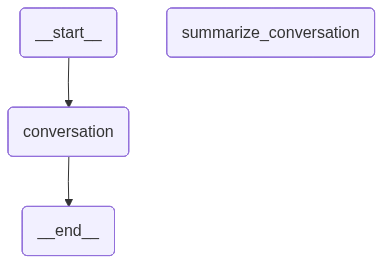

✅ 图渲染成功！


In [11]:
# 构建LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START

# 创建状态图
workflow = StateGraph(State)

# 添加节点
# conversation节点：处理用户输入并生成AI回复
workflow.add_node("conversation", call_model)
# summarize_conversation节点：生成对话摘要
workflow.add_node("summarize_conversation", summarize_conversation)

# 添加边
# 从开始节点到对话节点
workflow.add_edge(START, "conversation")
# 条件边：根据对话长度决定下一步
workflow.add_conditional_edges("conversation", should_continue)
# 摘要完成后结束
workflow.add_edge("summarize_conversation", END)

# 编译图并集成SQLite检查点器
# checkpointer参数启用状态持久化
graph = workflow.compile(checkpointer=memory)

# 显示图的Mermaid可视化
print("🎯 聊天机器人图结构已构建完成")
print("📊 下图显示了节点和边的连接关系")
# display(Image(graph.get_graph().draw_mermaid_png()))
# 展示图结构
# 图可视化
print("图可视化：")

# 方案1：尝试使用 Pyppeteer 本地渲染（推荐）
try:
    # 可视化：通过 Mermaid 渲染图结构
    display(Image(graph.get_graph().draw_mermaid_png()))
    print("✅ 图渲染成功！")
except Exception as e:
    print(f"❌ Pyppeteer 渲染失败: {e}")
    
    # 方案2：显示 Mermaid 文本格式
    print("\n📝 图结构（Mermaid 文本格式）：")
    print("=" * 50)
    mermaid_text = graph.get_graph().draw_mermaid()
    print(mermaid_text)
    print("=" * 50)
    
    # 方案3：显示图的节点和边信息
    print("\n🔗 图结构信息：")
    print("节点:", list(graph.get_graph().nodes.keys()))
    print("边:", list(graph.get_graph().edges))
    
    # 方案4：提供手动渲染说明
    print("\n💡 手动渲染说明：")
    print("1. 复制上面的 Mermaid 文本")
    print("2. 访问 https://mermaid.live/")
    print("3. 粘贴文本到编辑器中查看图形")
    print("4. 或者使用支持 Mermaid 的 Markdown 编辑器")

![image-20251004074336769](https://cdn.jsdelivr.net/gh/Fly0905/note-picture@main/imag/202510040743819.png)

现在，我们可以多次调用图来测试聊天机器人的功能。

## 测试聊天机器人

我们将进行以下测试：

### 测试场景
1. **自我介绍**：用户介绍自己的名字
2. **记忆测试**：询问用户名字，测试AI的记忆能力
3. **兴趣分享**：用户分享兴趣爱好
4. **状态持久化**：验证状态是否正确保存到数据库

### 配置说明
- **thread_id**：用于标识不同的对话会话
- **config**：包含线程ID的配置对象
- **持久化**：每次调用都会自动保存状态到SQLite数据库

In [12]:
# 创建对话线程配置
# thread_id用于标识不同的对话会话，相同ID的对话会共享状态
config = {"configurable": {"thread_id": "1"}}

print("🚀 开始聊天机器人测试")
print("=" * 50)

# 测试1：用户自我介绍
print("\n📝 测试1：用户自我介绍")
input_message = HumanMessage(content="你好！我是Lance")
output = graph.invoke({"messages": [input_message]}, config)
for m in output['messages'][-1:]:
    m.pretty_print()

# 测试2：AI记忆测试
print("\n🧠 测试2：AI记忆测试")
input_message = HumanMessage(content="我叫什么名字？")
output = graph.invoke({"messages": [input_message]}, config)
for m in output['messages'][-1:]:
    m.pretty_print()

# 测试3：用户分享兴趣
print("\n🎯 测试3：用户分享兴趣")
input_message = HumanMessage(content="我喜欢YoYoMA的古典音乐")
output = graph.invoke({"messages": [input_message]}, config)
for m in output['messages'][-1:]:
    m.pretty_print()

print("\n✅ 聊天机器人测试完成")
print("💾 所有对话状态已保存到SQLite数据库")

🚀 开始聊天机器人测试

📝 测试1：用户自我介绍
================================== Ai Message ==================================

你好，Lance！很高兴认识你。有什么我可以帮助你的吗？

🧠 测试2：AI记忆测试
================================== Ai Message ==================================

你告诉我你的名字是Lance。

🎯 测试3：用户分享兴趣
================================== Ai Message ==================================

Yo-Yo Ma是一位非常杰出的大提琴家，他的演奏深受许多人喜爱。他以其丰富的音乐表达和技巧闻名于世。如果你喜欢他的音乐，可能会对他的专辑和现场演出感兴趣。他的作品涵盖了广泛的古典音乐曲目，以及跨界合作项目，比如《丝绸之路》项目。你有特别喜欢的曲目或专辑吗？

✅ 聊天机器人测试完成
💾 所有对话状态已保存到SQLite数据库


让我们确认状态已正确保存到本地数据库。

## 状态持久化验证

我们将检查以下内容：

### 状态检查项目
1. **消息历史**：验证所有对话消息是否保存
2. **摘要信息**：检查对话摘要是否正确生成
3. **元数据**：查看执行步骤和配置信息
4. **时间戳**：确认状态保存时间

### 状态结构说明
- **values**：包含实际的状态数据（消息和摘要）
- **next**：下一步要执行的节点
- **config**：配置信息，包括线程ID和检查点ID
- **metadata**：执行元数据，包括步骤数和父节点信息

In [13]:
# 获取当前对话状态
config = {"configurable": {"thread_id": "1"}}
graph_state = graph.get_state(config)

print("🔍 检查保存的对话状态")
print("=" * 50)

# 显示状态信息
print(f"📊 状态概览:")
print(f"  - 消息数量: {len(graph_state.values['messages'])}")
print(f"  - 是否有摘要: {'是' if graph_state.values.get('summary') else '否'}")
print(f"  - 执行步骤: {graph_state.metadata.get('step', 'N/A')}")
print(f"  - 创建时间: {graph_state.created_at}")

print(f"\n💬 消息历史:")
for i, msg in enumerate(graph_state.values['messages'], 1):
    msg_type = "👤 用户" if hasattr(msg, 'content') and isinstance(msg, HumanMessage) else "🤖 AI"
    print(f"  {i}. {msg_type}: {msg.content[:50]}{'...' if len(msg.content) > 50 else ''}")

if graph_state.values.get('summary'):
    print(f"\n📝 对话摘要:")
    print(f"  {graph_state.values['summary'][:100]}{'...' if len(graph_state.values['summary']) > 100 else ''}")

print(f"\n✅ 状态持久化验证完成")
print(f"💾 状态已成功保存到SQLite数据库")

🔍 检查保存的对话状态
📊 状态概览:
  - 消息数量: 6
  - 是否有摘要: 否
  - 执行步骤: 7
  - 创建时间: 2025-11-14T03:53:17.855089+00:00

💬 消息历史:
  1. 👤 用户: 你好！我是Lance
  2. 🤖 AI: 你好，Lance！很高兴认识你。有什么我可以帮助你的吗？
  3. 👤 用户: 我叫什么名字？
  4. 🤖 AI: 你告诉我你的名字是Lance。
  5. 👤 用户: 我喜欢YoYoMA的古典音乐
  6. 🤖 AI: Yo-Yo Ma是一位非常杰出的大提琴家，他的演奏深受许多人喜爱。他以其丰富的音乐表达和技巧闻名于世...

✅ 状态持久化验证完成
💾 状态已成功保存到SQLite数据库


### 状态持久化验证

使用SQLite等数据库意味着状态是持久化的！

## 持久化的优势

### 数据持久性
- **程序重启**：即使重启Python内核，数据仍然保存
- **会话恢复**：可以恢复之前的对话状态
- **多实例支持**：多个应用实例可以共享同一数据库

### 实际应用场景
1. **Web应用**：用户关闭浏览器后重新打开，对话继续
2. **API服务**：服务重启后，用户会话不会丢失
3. **多用户系统**：不同用户拥有独立的对话线程
4. **数据分析**：可以分析历史对话数据

## 测试持久化功能

让我们验证状态确实被持久化保存了。即使重新获取状态，数据仍然存在。


In [14]:
# 重新获取状态，验证持久化
# 即使重新创建配置对象，状态仍然可以从数据库恢复
config = {"configurable": {"thread_id": "1"}}
graph_state = graph.get_state(config)

print("🔄 重新获取状态，验证持久化")
print("=" * 50)

# 验证状态是否完整恢复
print(f"📊 状态恢复验证:")
print(f"  - 消息数量: {len(graph_state.values['messages'])}")
print(f"  - 是否有摘要: {'是' if graph_state.values.get('summary') else '否'}")
print(f"  - 状态完整性: {'✅ 完整' if graph_state.values else '❌ 不完整'}")

print(f"\n💾 持久化状态:")
print(f"  - 数据库文件: {db_path}")
print(f"  - 线程ID: {config['configurable']['thread_id']}")
print(f"  - 检查点ID: {graph_state.config.get('checkpoint_id', 'N/A')}")

print(f"\n🎉 持久化验证成功！")
print(f"✨ 状态已成功保存到SQLite数据库，可以跨会话恢复")

🔄 重新获取状态，验证持久化
📊 状态恢复验证:
  - 消息数量: 6
  - 是否有摘要: 否
  - 状态完整性: ✅ 完整

💾 持久化状态:
  - 数据库文件: state_db/example.db
  - 线程ID: 1
  - 检查点ID: N/A

🎉 持久化验证成功！
✨ 状态已成功保存到SQLite数据库，可以跨会话恢复


## 学习总结

恭喜！你已经成功学习了如何使用外部数据库实现聊天机器人的持久化内存。

### 🎯 核心知识点

#### 1. 检查点器（Checkpointer）
- **作用**：管理图状态的保存和恢复
- **类型**：内存检查点器 vs 数据库检查点器
- **优势**：支持状态持久化、多线程访问、会话恢复

#### 2. SQLite数据库
- **特点**：轻量级、零配置、跨平台
- **应用**：适合中小型应用的持久化存储
- **集成**：与LangGraph无缝集成

#### 3. 状态管理
- **消息历史**：存储完整的对话记录
- **摘要机制**：自动生成对话摘要，节省存储空间
- **智能路由**：根据对话长度决定是否进行摘要

#### 4. 图架构设计
- **节点**：conversation（对话）、summarize_conversation（摘要）
- **边**：条件边实现智能路由
- **状态**：继承MessagesState，添加summary字段

### 🛠️ 实践技能

#### 代码实现
- ✅ 创建SQLite数据库连接
- ✅ 配置检查点器
- ✅ 设计状态类
- ✅ 实现节点函数
- ✅ 构建条件边
- ✅ 编译图并集成检查点器

#### 测试验证
- ✅ 多轮对话测试
- ✅ 状态持久化验证
- ✅ 记忆能力测试
- ✅ 摘要功能测试


#### 相关资源
- [LangGraph官方文档](https://langchain-ai.github.io/langgraph/)
- [SQLite检查点器文档](https://langchain-ai.github.io/langgraph/concepts/low_level/#checkpointer)
- [PostgreSQL检查点器](https://langchain-ai.github.io/langgraph/how-tos/persistence_postgres/)

### 💡 关键收获

1. **持久化的重要性**：生产环境必须考虑数据持久化
2. **状态管理**：合理设计状态结构，平衡性能和功能
3. **模块化设计**：将复杂功能分解为独立的节点
4. **测试驱动**：通过测试验证功能的正确性

### 🎉 恭喜完成！

你已经掌握了LangGraph中的基础功能：节点、边、状态、路由，短期记忆和长期记忆。

继续探索下一个模块，学习更多高级功能！
